# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Комосский Егор Артемович и Рыжиков Иван Сергеевич

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).



## Основные теоретические положения

1. **Модель дискретного многогармонического сигнала**

   $$x[n] = \sum_{k=0}^{K-1} A_k \cos\big(\omega_k nT + \varphi_k\big), \quad n = 0,\dots,N.$$

2. **Линейное сглаживание (скользящее среднее по $2h+1$ точкам)**

   $$y[n] = \frac{1}{2h+1} \sum_{k=-h}^{h} x[n+k], \quad h = \frac{L-1}{2},\; L = 5, 9.$$

3. **Полиномиальное сглаживание**

   Общий вид свёрточного фильтра степени 2 или 4:

   $$y[n] = \sum_{k=-h}^{h} c_k\,x[n+k].$$


   1. **Полином степени 2, 5 точек (L = 5, h = 2)**  

    $$
    c = \frac{1}{35}\,[-3,\; 12,\; 17,\; 12,\; -3]
    $$

   2. **Полином степени 2, 9 точек (L = 9, h = 4)**  

    $$
    c = \frac{1}{231}\,[-21,\; 14,\; 39,\; 54,\; 59,\; 54,\; 39,\; 14,\; -21]
    $$

   3. **Полином степени 4, 7 точек (L = 7, h = 3)**  

    $$
    c = \frac{1}{231}\,[5,\; -30,\; 75,\; 131,\; 75,\; -30,\; 5]
    $$

   4. **Полином степени 4, 11 точек (L = 11, h = 5)**  
    $$
    c = \frac{1}{429}\,[18,\; -45,\; -10,\; 60,\; 120,\; 143,\; 120,\; 60,\; -10,\; -45,\; 18]
    $$




1. **Дискретное преобразование Фурье (ДПФ)**

   $$X[m] = \sum_{n=0}^{N} x[n] e^{-j \frac{2\pi}{N+1} mn}, \quad m = 0,\dots,N.$$

   Амплитудный спектр:

   $$A[m] = |X[m]|.$$

2. **Передаточная функция конечного импульсного фильтра**



   1. **Общий вид передаточной функции КИХ-фильтра**

   $$
   H(\omega) = \sum_{k=-h}^{h} c_k e^{-j\omega k}, \qquad \omega \in [-\pi, \pi].
   $$

   Для симметричных коэффициентов $c_{-k} = c_k$:

   $$
   H(\omega) = c_0 + 2 \sum_{k=1}^{h} c_k \cos(\omega k).
   $$

   2. **Связь со спектрами сигналов**

   $$
   H(\omega) = \frac{Y(\omega)}{X(\omega)}, \qquad
   Y(\omega) = H(\omega)\,X(\omega).
   $$

   3. **Переход от $\omega$ к нормированной частоте $f$**

   $$
   \omega = 2\pi f, \qquad f \in [-0.5, 0.5].
   $$

   4. **Линейное сглаживание (скользящее среднее)**  

   Общий вид:

   $$
   H_{\text{MA}}(\omega) =
   \frac{1}{2h+1}\,
   \frac{\sin\big((2h+1)\omega/2\big)}{\sin(\omega/2)},
   $$

   или в терминах $f$ при $\omega = 2\pi f$:

   $$
   \tilde{H}_{2h+1}(f) =
   \frac{1}{2h+1}\,
   \frac{\sin\big((2h+1)\pi f\big)}{\sin(\pi f)}.
   $$

   Отсюда частные случаи:

   $$
   \tilde{H}_{5}(f) = \frac{1}{5} \frac{\sin(5\pi f)}{\sin(\pi f)}, \qquad
   \tilde{H}_{9}(f) = \frac{1}{9} \frac{\sin(9\pi f)}{\sin(\pi f)}.
   $$

    5. **Полиномиальное сглаживание 2-й степени (функция `H_2(w, n)`)**

    Общий вид:

    $$
    H_2(\omega, n) =
    \frac{3}{(2h+1)\big(4h^2+4h-3\big)}
    \left[
    \big(3h^2+3h-1\big)\Big(1 + 2\sum_{k=1}^{h}\cos(\omega k)\Big)
    - 10\sum_{k=1}^{h}k^2 \cos(\omega k)
    \right].
    $$

    Для конкретных $n$ (подставляем $h=2$ и $h=4$) получаем такие формулы:

    - при $n=5$:

    $$
    H_{5}(\omega) =
    \frac{1}{35} \left( -17 + 2 \sum_{k=1}^{2} (5k^2 - 17)\cos(\omega k) \right),
    $$

    - при $n=9$:

    $$
    H_{9}(\omega) =
    \frac{1}{135} \left( -59 + 2 \sum_{k=1}^{4} (5k^2 + 59)\cos(\omega k) \right).
    $$

   5. **Полиномиальное сглаживание 4-й степени (функция `H_4(w, n)`)**

   Полиномиальное сглаживание 4-й степени строится так:  
в каждом окне из $2h+1$ точек аппроксимируем сигнал полиномом

$$
p(k) = a_0 + a_1 k + a_2 k^2 + a_3 k^3 + a_4 k^4,
\qquad k=-h,\dots,h,
$$

минимизируя сумму квадратов
$$
\sum_{k=-h}^{h}\big(x[n+k] - p(k)\big)^2.
$$

**Отфильтрованное значение** в центре окна — это $p(0)=a_0$, и его можно переписать в виде свёртки  
(здесь появляются коэффициенты фильтра $c_k$):

$$
y[n] = a_0 = \sum_{k=-h}^{h} c_k\,x[n+k],
\qquad c_{-k} = c_k.
$$

Отсюда **общий вид частотной характеристики** фильтра 4-й степени:

$$
H_4(\omega) = \sum_{k=-h}^{h} c_k e^{-j\omega k}
            = c_0 + 2\sum_{k=1}^{h} c_k \cos(\omega k).
$$

Получим $H_4(\omega)$ через суммы

$$
S(m) = \sum_{k=-h}^{h} k^m,\quad m=0,2,4,6,8,
$$

и определитель нормальной матрицы МНК:

$$
D = S_0(S_4S_8 - S_6^2) - S_2(S_2S_8 - S_4S_6) + S_4(S_2S_6 - S_4^2),
$$

а также коэффициенты

$$
a_{\cos} = S_4 S_8 - S_6^2,\quad
b_{\cos} = -(S_2 S_8 - S_4 S_6),\quad
c_{\cos} = S_2 S_6 - S_4^2.
$$

При подстановке конкретных $n$ получаем:

 - для $n = 7$:

    $$
    H_{7}(\omega) =
    \frac{1}{231}\left(
    131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)
    \right),
    $$

  - для $n = 11$:

    $$
    H_{11}(\omega)=
    \frac{1}{429}\left(
    143 + 240\cos(\omega) + 120\cos(2\omega)
    - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega)
    \right).
    $$



## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.





## Выполнение работы

In [18]:
# Импорт необходимых библиотек
import math
import numpy as np
import matplotlib.pyplot as plt



### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $frequencies=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k frequencies+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [19]:
N = 31  # количество отсчетов
T = 1   # шаг дискретизации
t = np.arange(N+1) * T  # временные отсчеты
np.random.seed(42)

# Гармоники
f = np.arange(0, 1.1, 0.1) * np.pi

# Амплитуды
amplitudes = np.random.randint(1, 12, size=len(f))
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, size=len(f))

# Формирование дизкретизированного сигнала
signal = np.zeros(N+1)
for i in range(len(f)):
    signal += amplitudes[i] * np.cos(f[i] * t + phases[i])

t_analog = np.linspace(0, N*T, 1000)  # для аналогового сигнала
analog_signal = np.zeros(len(t_analog))
for i in range(len(f)):
    analog_signal += amplitudes[i] * np.cos(f[i] * t_analog + phases[i])

In [20]:
f

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265])

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

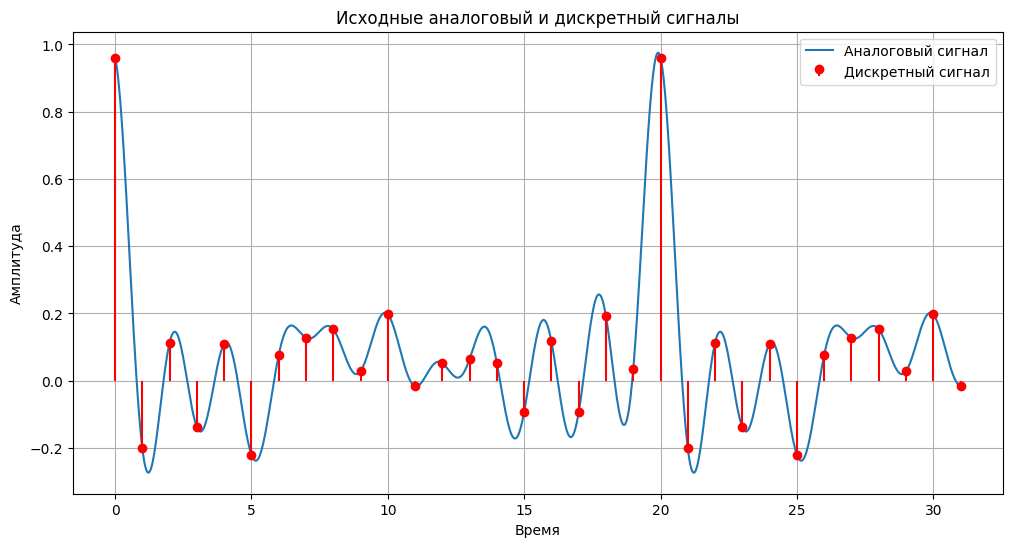

In [21]:
# График аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(t_analog, analog_signal, label='Аналоговый сигнал')
plt.stem(t, signal, 'r.', label='Дискретный сигнал', basefmt=" ")
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Исходные аналоговый и дискретный сигналы')
plt.legend()
plt.show()


### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


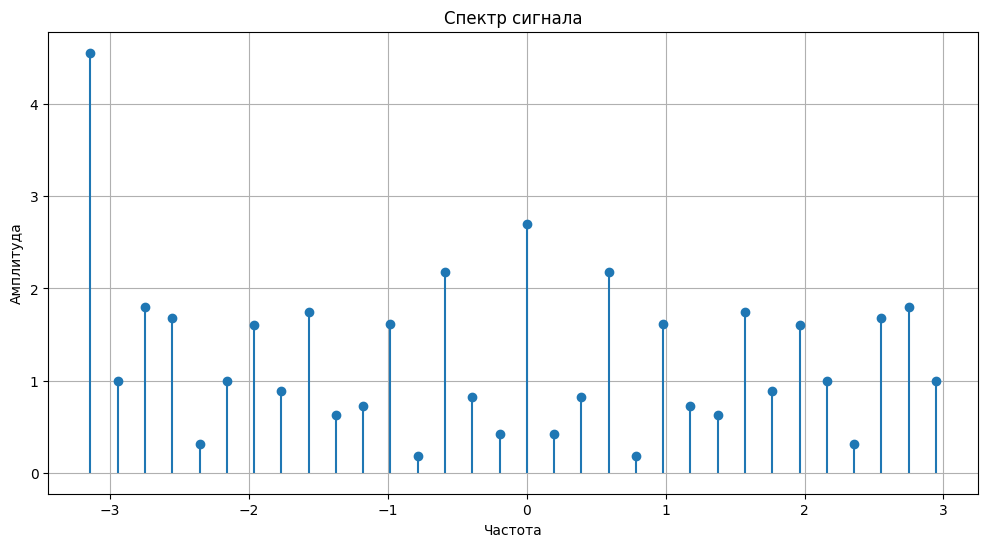

In [22]:
# Преобразование Фурье
frequencies = np.fft.fftfreq(N + 1, d=T) * 2 * math.pi
spectrum = np.fft.fft(signal)

# График спектра исходного сигнала
plt.figure(figsize=(12, 6))

plt.stem(frequencies, np.abs(spectrum), basefmt=" ")
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формулы передаточной функции для линейного сглаживания по 5-ти и 9-ти точек.

$$ \tilde{H}_{5}(f) =  \frac{1}{5}  \frac{\sin(5 \pi f)}{\sin(\pi f)}$$

$$ \tilde{H}_{9}(f) =  \frac{1}{9}  \frac{\sin(9 \pi f)}{\sin(\pi f)}$$

In [23]:
def smooth_linear(s, n):
    h = (n - 1) // 2
    result = np.zeros_like(s)
    for i in range(len(s)):
        acc = 0
        for j in range(-h, h+1):
            acc += s[(i + j) % len(s)]
        result[i] = acc / n
    return result

In [24]:
smoother_linear_by_5_points = smooth_linear(signal, 5)
smoother_linear_by_9_points = smooth_linear(signal, 9)

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


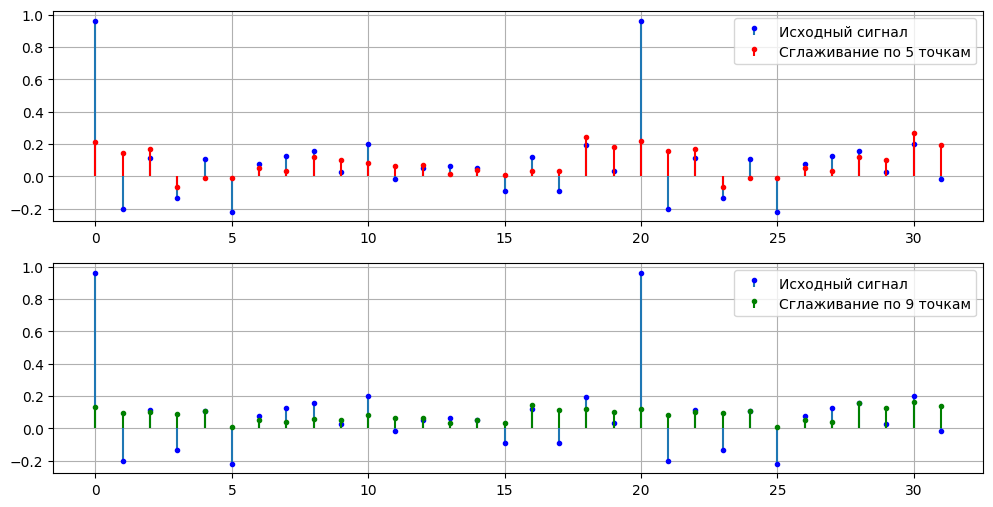

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(t, signal,  label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(t, smoother_linear_by_5_points, 'r', label='Сглаживание по 5 точкам', markerfmt='r.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t, signal,  label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(t, smoother_linear_by_9_points, 'g', label='Сглаживание по 9 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


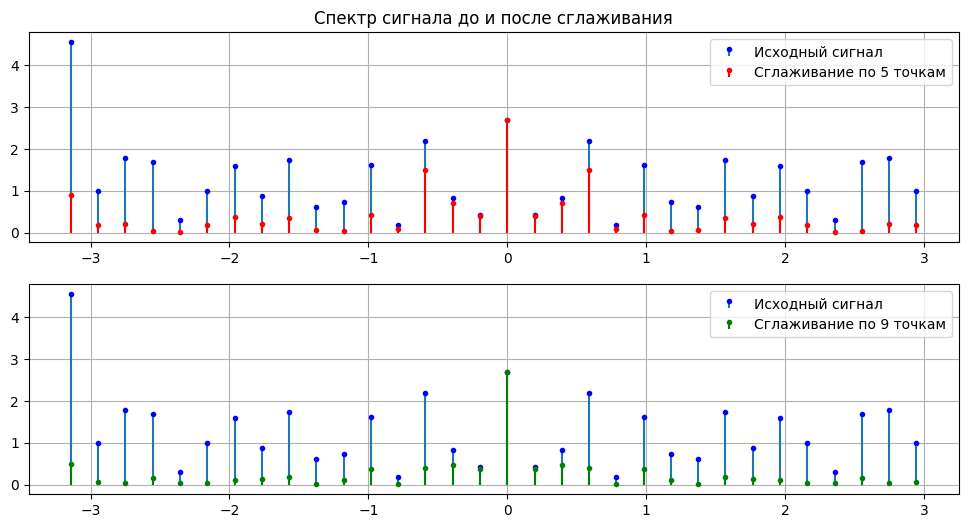

In [26]:
smoother_linear_by_5_points_spectrum = np.fft.fft(smoother_linear_by_5_points)
smoother_linear_by_9_points_spectrum = np.fft.fft(smoother_linear_by_9_points)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_linear_by_5_points_spectrum), 'r', label='Сглаживание по 5 точкам', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после сглаживания")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_linear_by_9_points_spectrum), 'g', label='Сглаживание по 9 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

### Задание 8

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Так как полученный после фильтра можно выразить через $H(\omega)$, как

$$
Y(\omega) = H(\omega) \cdot X(\omega)
$$

Выразим отсюда передаточную функцию $H(\omega)$, как отношение $Y(\omega)$ к $X(\omega)$, и сравним её значение с теоретическим для каждого из фильтров:



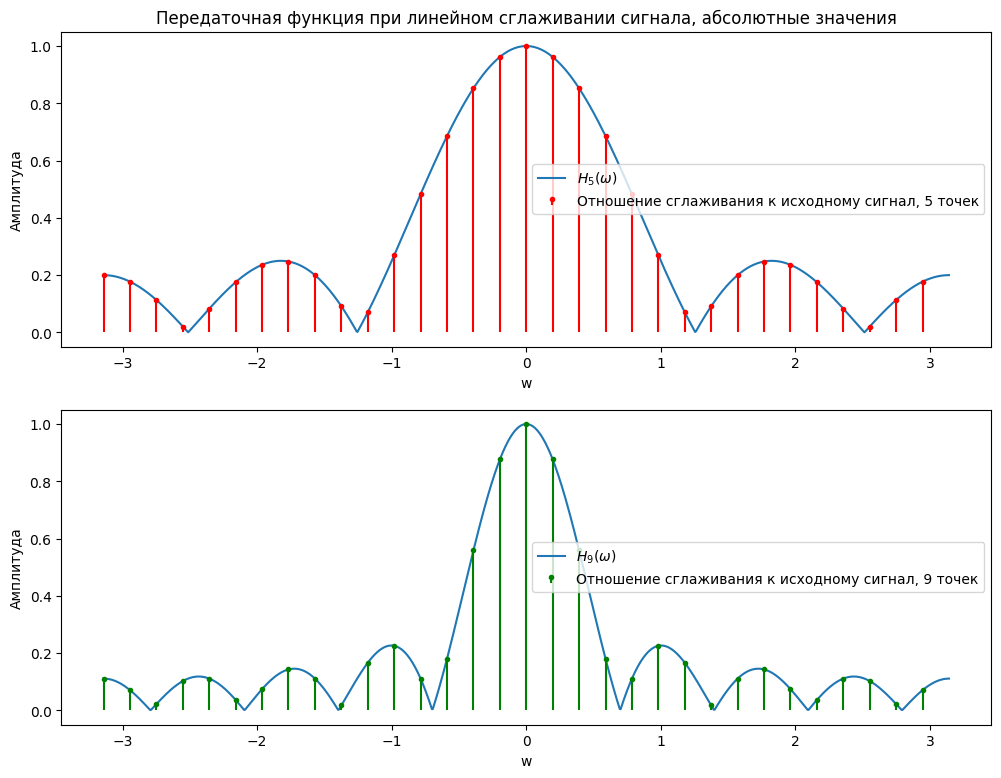

In [27]:
def H_1(w, n):
    h = (n - 1) // 2
    f = w / 2 / math.pi
    return np.divide(
        1 / (2 * h + 1) * np.sin(2 * math.pi * f * (h + 1 / 2)),
        np.sin(math.pi * f),
        out=np.ones_like(f),
        where=np.sin(math.pi * f) != 0,
    )


w = np.linspace(-math.pi, math.pi, 1000)

H_linear_5 = H_1(w, 5)
H_linear_9 = H_1(w, 9)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_linear_5), label="$ H_5(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_linear_by_5_points_spectrum / spectrum),
    'r',
    label='Отношение сглаживания к исходному сигнал, 5 точек',
    markerfmt='r.',
    basefmt=" ",
)
plt.title(
    'Передаточная функция при линейном сглаживании сигнала, абсолютные значения'
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(H_linear_9), label="$ H_9(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_linear_by_9_points_spectrum / spectrum),
    'g',
    label='Отношение сглаживания к исходному сигнал, 9 точек',
    markerfmt='g.',
    basefmt=" ",
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()


plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()
plt.show()

Как видно из полученных графиков фильтр ведёт себя в точности как описывает теория, а именно: низкочастотные характеристики остаются без изменений, а высокочастотные части спектра сигнала уменьшаются.

### Задание 8

Повторить п. 4–7 для следующих фильтров:
1) Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
2) Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

#### а) Полином 2-ой степени



Для дискретного сигнала применить сглаживание 2-ой степени по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула передаточной функции (частотной характеристики) фильтра $H(\omega)$.

$ H_{5}(\omega) = \cfrac{1}{35} \left( -17 + 2 \displaystyle \sum_{k=1}^{k=2} (5k^2 - 17) \cos(\omega k) \right)  $


$ H_{9}(\omega) = \cfrac{1}{135}  \left( -59 + 2\displaystyle \sum_{k=1}^{k=4} (5k^2 + 59) \cos(\omega k) \right) $

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

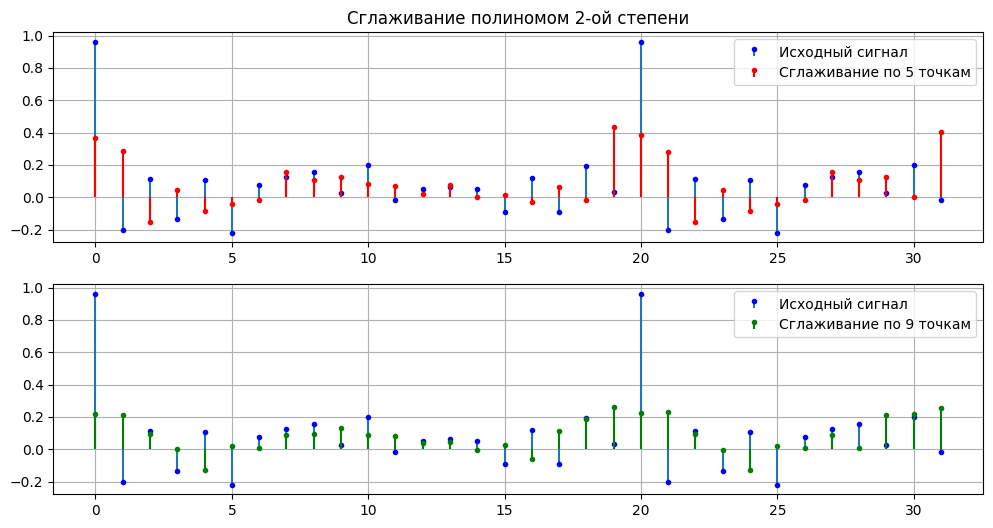

In [ ]:
def smooth_poly2_5points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 5 точек, полином степени 2
    c = np.array([-3, 12, 17, 12, -3]) / 35

    for n in range(N):
        acc = 0
        for k in range(-2, 3):
            acc += c[k + 2] * signal[(n + k) % N]
        smoothed[n] = acc

    return smoothed


def smooth_poly2_9points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 9 точек, полином степени 2
    c = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231

    for n in range(N):
        acc = 0
        for k in range(-4, 5):
            acc += c[k + 4] * signal[(n + k) % N]
        smoothed[n] = acc

    return smoothed

# Применение фильтра
smoother_poly2_by_5_points = smooth_poly2_5points(signal)
smoother_poly2_by_9_points = smooth_poly2_9points(signal)


# Построение графика
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("Сглаживание полиномом 2-ой степени")

plt.stem(t, signal, label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(
    t,
    smoother_poly2_by_5_points,
    'r',
    label='Сглаживание по 5 точкам',
    markerfmt='r.',
    basefmt=" ",
)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t, signal, label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(
    t,
    smoother_poly2_by_9_points,
    'g',
    label='Сглаживание по 9 точкам',
    markerfmt='g.',
    basefmt=" ",
)
plt.grid(True)
plt.legend()

plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

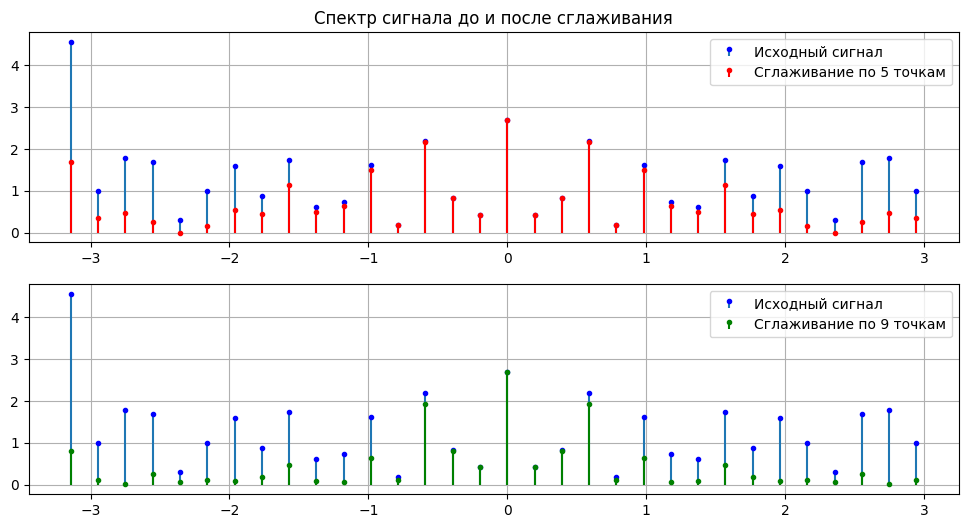

In [29]:
# Получение спектра с помощью ДПФ
smoother_poly2_by_5_points_spectrum = np.fft.fft(smoother_poly2_by_5_points)
smoother_poly2_by_9_points_spectrum = np.fft.fft(smoother_poly2_by_9_points)

# Построение графика спектра
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_poly2_by_5_points_spectrum), 'r', label='Сглаживание по 5 точкам', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после сглаживания")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_poly2_by_9_points_spectrum), 'g', label='Сглаживание по 9 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


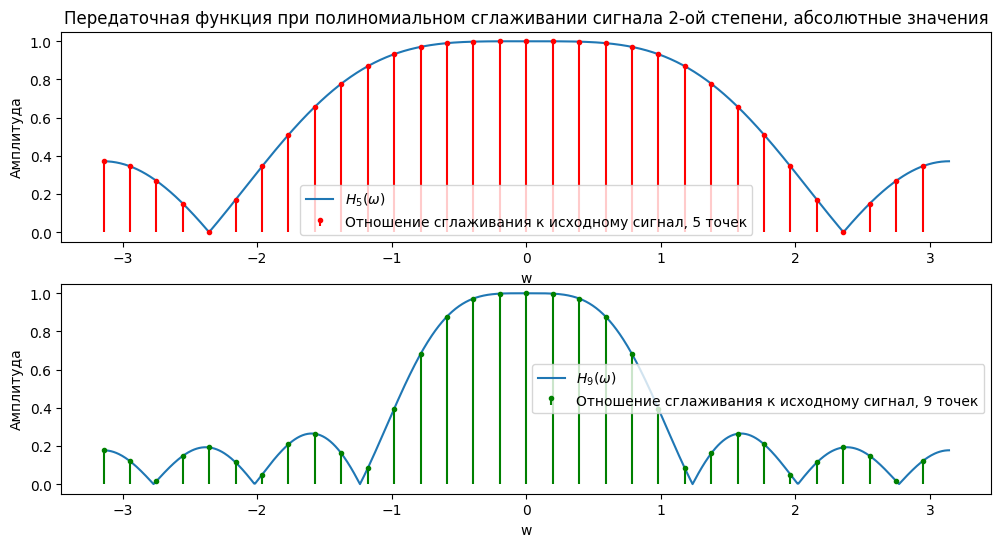

In [30]:
def H_2(w, n):
    h = (n - 1) // 2
    sum_cos_0 = np.sum(
        [np.cos(w * k) for k in range(1, h + 1)], axis=0
    )
    sum_cos_2 = np.sum(
        [k**2 * np.cos(w * k) for k in range(1, h + 1)], axis=0
    )
    res = (3 / ((2 * h + 1) * (4 * h**2 + 4 * h - 3))) * (
        (3 * h**2 + 3 * h - 1) * (1 + 2 * sum_cos_0) - 10 * sum_cos_2
    )
    return res


w = np.linspace(-math.pi, math.pi, 1000)

H_poly2_5 = H_2(w, 5)
H_poly2_9 = H_2(w, 9)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_poly2_5), label="$ H_5(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_poly2_by_5_points_spectrum / spectrum),
    'r',
    label='Отношение сглаживания к исходному сигнал, 5 точек',
    markerfmt='r.',
    basefmt=" ",
)
plt.title(
    'Передаточная функция при полиномиальном сглаживании сигнала 2-ой степени, абсолютные значения'
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(H_poly2_9), label="$ H_9(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_poly2_by_9_points_spectrum / spectrum),
    'g',
    label='Отношение сглаживания к исходному сигнал, 9 точек',
    markerfmt='g.',
    basefmt=" ",
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()


plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()
plt.show()

Как видно из полученных графиков, ДПФ подтвердило, что полиномиальное сглаживание 2-й степени работает как фильтр с частотной характеристикой $H(\omega)$, и результаты эксперимента полностью совпадают с теоретическими значениями передаточной функции.

Полиномиальное сглаживание 2-й степени хорошо сохраняет форму низкочастотных компонент сигнала, при этом чем больше окно (5 → 9 точек), тем сильнее подавляются высокие частоты и тем более сглаженным, но меньше низкочастотная полоса пропускания.

#### б) Полином 4-ой степени


Для дискретного сигнала применить сглаживание 4-ой степени по 7-ти и 11-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула передаточной функции (частотной характеристики) фильтра $H(\omega)$.

$ H_{7}(\omega) =
\cfrac{1}{231} \left(
131 + 150\cos(\omega) -
60\cos(2\omega ) +
10\cos(3\omega)
\right)$


$H_{11}(\omega)=
\frac{1}{429}\left(
143 + 240\cos(\omega) +
120\cos(2\omega) -
20\cos(3\omega) -
90\cos(4\omega) +
36\cos(5\omega)
\right)$

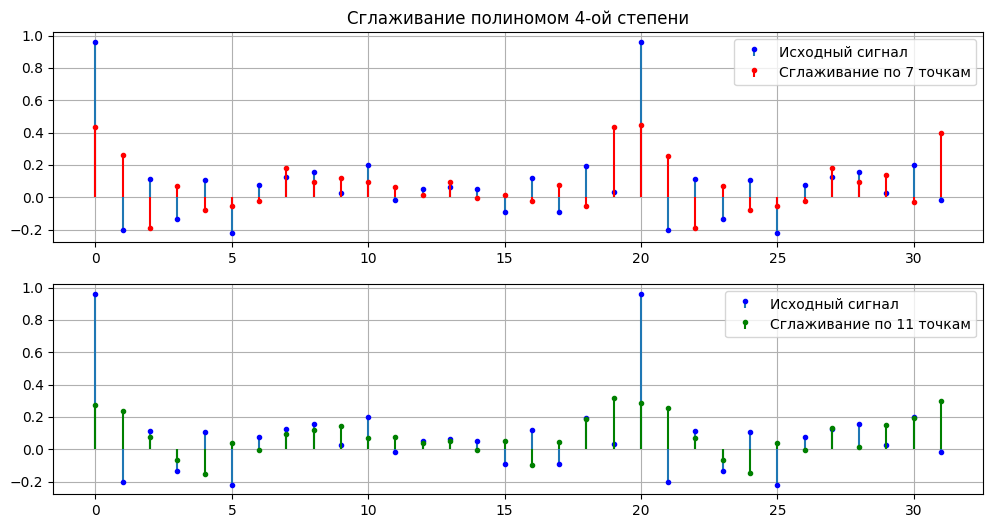

In [31]:
def smooth_poly4_7points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 7 точек, полином степени 4
    c = np.array([5, -30, 75, 131, 75, -30, 5]) / 231

    for n in range(N):
        acc = 0
        for k in range(-3, 4):
            acc += c[k + 3] * signal[(n + k) % N]
        smoothed[n] = acc

    return smoothed

def smooth_poly4_11points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 11 точек, полином степени 4
    c = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429

    for n in range(N):
        acc = 0
        for k in range(-5, 6):
            acc += c[k + 5] * signal[(n + k) % N]
        smoothed[n] = acc

    return smoothed

# Применение фильтра
smoother_poly4_by_7_points = smooth_poly4_7points(signal)
smoother_poly4_by_11_points = smooth_poly4_11points(signal)


# Построение графика
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("Сглаживание полиномом 4-ой степени")

plt.stem(t, signal, label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(
    t,
    smoother_poly4_by_7_points,
    'r',
    label='Сглаживание по 7 точкам',
    markerfmt='r.',
    basefmt=" ",
)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t, signal, label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(
    t,
    smoother_poly4_by_11_points,
    'g',
    label='Сглаживание по 11 точкам',
    markerfmt='g.',
    basefmt=" ",
)
plt.grid(True)
plt.legend()

plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

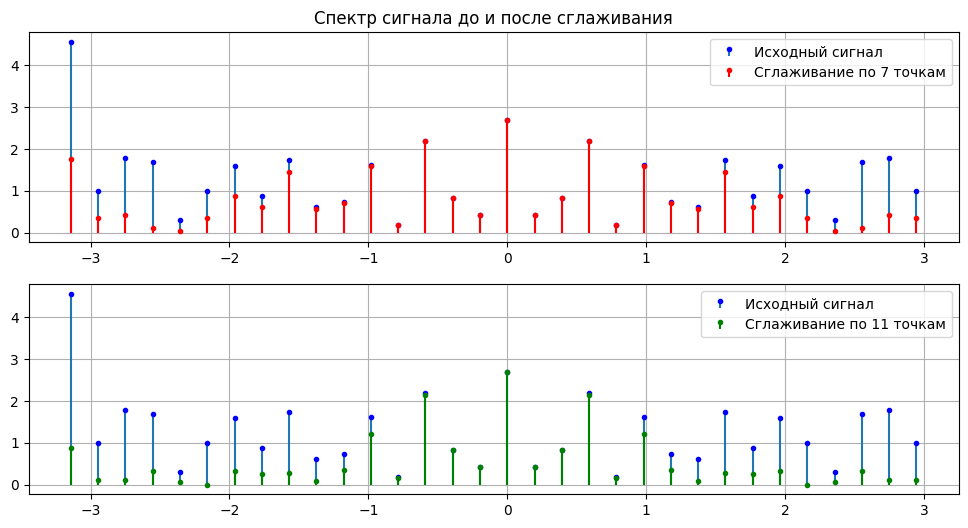

In [32]:
# Получение спектра с помощью ДПФ
smoother_poly4_by_7_points_spectrum = np.fft.fft(smoother_poly4_by_7_points)
smoother_poly4_by_11_points_spectrum = np.fft.fft(smoother_poly4_by_11_points)

# Построение графика спектра
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_poly4_by_7_points_spectrum), 'r', label='Сглаживание по 7 точкам', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после сглаживания")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_poly4_by_11_points_spectrum), 'g', label='Сглаживание по 11 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


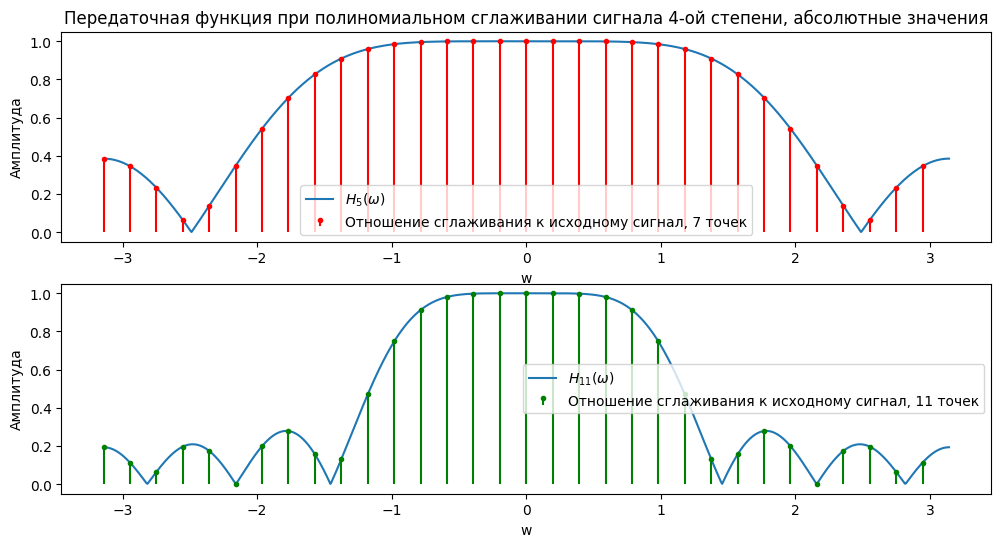

In [38]:
def H_4(w, n):
    h = (n - 1) // 2
    def S(m):
        return sum([k**m for k in range(-h, h + 1)])

    S0 = S(0)
    S2 = S(2)
    S4 = S(4)
    S6 = S(6)
    S8 = S(8)
    D = S0 * (S4 * S8 - S6**2) - S2 * (S2 * S8 - S4 * S6) + S4 * (S2 * S6 - S4**2)
    a_cos = S4 * S8 - S6**2
    b_cos = -(S2 * S8 - S4 * S6)
    c_cos = S2 * S6 - S4**2
    sum_cos_0 = np.sum(
        [
            (a_cos + b_cos * k**2 + c_cos * k**4) * np.cos(w * k)
            for k in range(1, h + 1)
        ],
        axis=0,
    )
    res = (S4 * S8 - S6**2 + 2 * sum_cos_0) / D
    return res


w = np.linspace(-math.pi, math.pi, 1000)

H_poly4_7 = H_4(w, 7)
H_poly4_11 = H_4(w, 11)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_poly4_7), label="$ H_5(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_poly4_by_7_points_spectrum / spectrum),
    'r',
    label='Отношение сглаживания к исходному сигнал, 7 точек',
    markerfmt='r.',
    basefmt=" ",
)
plt.title(
    'Передаточная функция при полиномиальном сглаживании сигнала 4-ой степени, абсолютные значения'
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(H_poly4_11), label="$ H_{11}(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_poly4_by_11_points_spectrum / spectrum),
    'g',
    label='Отношение сглаживания к исходному сигнал, 11 точек',
    markerfmt='g.',
    basefmt=" ",
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()


plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()
plt.show()

Передаточные функции, рассчитанные теоретически для фильтра 4-й степени, полностью совпадают с характеристиками, полученными экспериментально через спектральный анализ результата сглаживания. Это подтверждает корректность как вывода формулы $H(\omega)$ в 3 лабораторной работе, так и реализации фильтра в виде свёртки с соответствующими коэффициентами.

Фильтр степени 4 является линейным низкочастотным фильтром без фазового сдвига, который точно сохраняет полиномиальные компоненты до 4-го порядка и эффективно подавляет высокочастотный шум. Увеличение длины окна (с 7 до 11 точек) приводит к более мягкой форме ЧХ и существенному улучшению сглаживания, но одновременно усиливает размывание быстрых изменений сигнала.


## Выводы

В работе были реализованны фильтры сглаживания полиномами. Изучен дискретного преобразования Фурье, который позволяет раскладывать сигнал в виде спектра и проводить спектральный анализ частот.

Полученные спектр созданного случайного сигнала с 11 гармониками со различными амплитудами и начальными для каждого из фильтров показал, полное соответствие теории: пропускание низких частот и ослабление высоких.

При этом с увеличением степени полинома полоса пропускания низких частот становиться шире, а сила ослабления высоких частот больше.

<!-- Мы строили, строили, и наконец построили! -->
